In [38]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.math_utils import ortho_find
from matplotlib.colors import LogNorm, SymLogNorm

In [21]:
from helper_functions import _make_disk_L, field_from_sliceplot

In [22]:
def ss_properties(ds, velocity=False):
    print("ds = ", ds)
    ad = ds.all_data()
    try:
        # find ss properties
        ss_creation = ad['SmartStar', 'creation_time'].to('yr')
        ss_pos = ad['SmartStar', 'particle_position'].to('unitary')[0]
        ss_mass = ad['SmartStar', 'particle_mass'].to('Msun')[0]

        # find ss age
        time = ds.current_time.to('yr').d
        creation = ss_creation.d  # strip units off variables
        ss_age = time - creation
    except:
        ss_pos = None
        ss_mass=0*yt.units.msun
        ss_age = [0*yt.units.Myr]
    if velocity:
        ss_vel = ad['SmartStar', 'particle_velocity'].to('km/s')[0]
        return ss_pos, ss_mass, ss_age, ss_vel

    return ss_pos, ss_mass, ss_age

In [23]:
ds = yt.load("/Backup01/sgordon/pleiades/seed1-bh-only/270msun/replicating-beckmann/1B.m16-4dx/DD0226/DD0226")
ss_pos, ss_mass, ss_age = ss_properties(ds, velocity=False)
disc_r_pc = 0.1
disc_h_pc = 0.1
_, L = _make_disk_L(ds, ss_pos, disc_r_pc, disc_h_pc)
ss_pos, ss_mass, ss_age, ss_vel = ss_properties(ds, velocity=True)
ss_vel

yt : [INFO     ] 2024-01-10 17:00:36,096 Parameters: current_time              = 14.041792748193
yt : [INFO     ] 2024-01-10 17:00:36,097 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-01-10 17:00:36,098 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-01-10 17:00:36,099 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-01-10 17:00:36,100 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-01-10 17:00:36,101 Parameters: current_redshift          = 26.166413915506
yt : [INFO     ] 2024-01-10 17:00:36,102 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2024-01-10 17:00:36,103 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2024-01-10 17:00:36,103 Parameters: omega_radiation           = 0
yt : [INFO     ] 2024-01-10 17:00:36,104 Parameters: hubble_constant           = 0.71


ds =  DD0226


Parsing Hierarchy : 100%|██████████| 3044/3044 [00:00<00:00, 7428.73it/s]
yt : [INFO     ] 2024-01-10 17:00:36,747 Gathering a field list (this may take a moment.)


ds =  DD0226


unyt_array([-0.97457708, -0.5256856 , -0.7469516 ], 'km/s')

In [30]:
field = 'velocity_cylindrical_radius'
disc_h_pc = disc_r_pc = 0.8
width = 0.2
dir = L
vecs = ortho_find(L)
dir = vecs[0]
north = vecs[1]
disk = ds.disk(ss_pos, dir, disc_r_pc, disc_h_pc)
disk.set_field_parameter("center", ss_pos)
disk.set_field_parameter("bulk_velocity", ss_vel.to('cm/s'))
vel_r_cyl = field_from_sliceplot(field, ds, disk, ss_pos, width, north, dir, npixels=800, radius=False)

yt : [INFO     ] 2024-01-10 17:04:20,883 xlim = -0.000004 0.000004
yt : [INFO     ] 2024-01-10 17:04:20,886 ylim = -0.000004 0.000004
yt : [INFO     ] 2024-01-10 17:04:20,898 Making a fixed resolution buffer of (('gas', 'velocity_cylindrical_radius')) 800 by 800


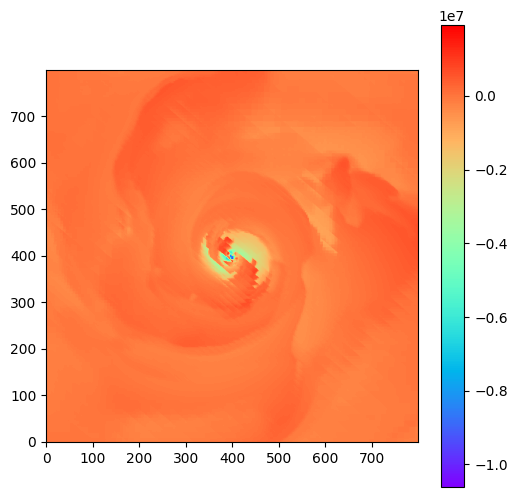

ss_age = [0.96010047] Myr, ss_mass = 2020.8916806405375 Msun, ds = DD0226


In [33]:
fig = plt.figure(figsize=(6,6))
im1 = plt.imshow(vel_r_cyl, cmap='rainbow', origin="lower")
#im1.set_clim(-20, 0)
plt.colorbar(im1)
plt.show()
print(f"ss_age = {ss_age/1e6} Myr, ss_mass = {ss_mass}, ds = {ds}")

yt : [INFO     ] 2024-01-10 17:05:37,482 xlim = -0.000004 0.000004
yt : [INFO     ] 2024-01-10 17:05:37,485 ylim = -0.000004 0.000004
yt : [INFO     ] 2024-01-10 17:05:37,487 Making a fixed resolution buffer of (('gas', 'velocity_cylindrical_theta')) 800 by 800



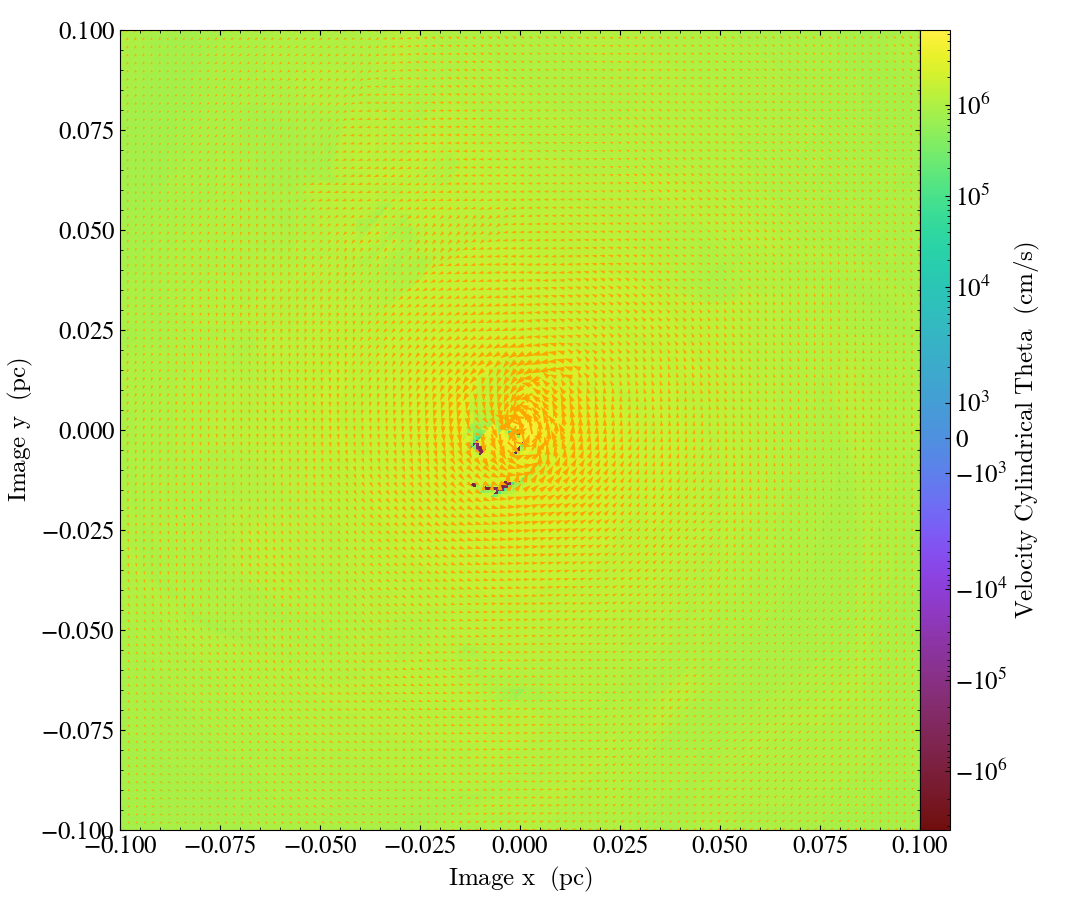

In [34]:
p = yt.SlicePlot(ds, dir, ("gas", "velocity_cylindrical_theta"), center=disk.center, width=(width, "pc"), data_source=disk, north_vector=north)
p.annotate_cquiver(
    ("gas", "cutting_plane_velocity_x"),
    ("gas", "cutting_plane_velocity_y"),
    factor=8,
    color="orange",
)
p.show()

yt : [INFO     ] 2024-01-10 17:05:43,134 Making a fixed resolution buffer of (('gas', 'velocity_cylindrical_radius')) 800 by 800


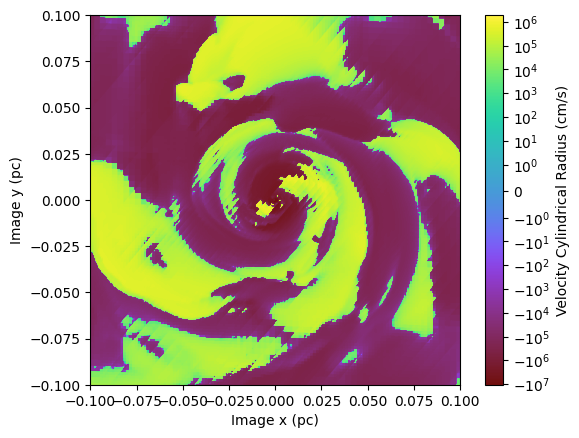

In [35]:
frb = p.data_source.to_frb((width, "pc"), 800, periodic=True)
vel_r_cyl = frb[("gas", "velocity_cylindrical_radius")]
vmin = vel_r_cyl.min()*2
vmax = vel_r_cyl.max()*0.5
bounds = (-width/2, width/2, -width/2, width/2)
plt.imshow(vel_r_cyl.d, cmap='arbre', extent=bounds, origin="lower", aspect='equal', norm=SymLogNorm(linthresh=1, linscale=1, vmin=vmin, vmax=vmax))

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Velocity Cylindrical Radius (cm/s)')

# Adjust colormap scaling to match yt's automatic scaling
vmin = vel_r_cyl.min()
vmax = vel_r_cyl.max()
plt.clim(vmin, vmax)

# Show the plot
plt.xlabel('Image x (pc)')
plt.ylabel('Image y (pc)')
plt.show()

yt : [INFO     ] 2024-01-10 17:05:44,744 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800


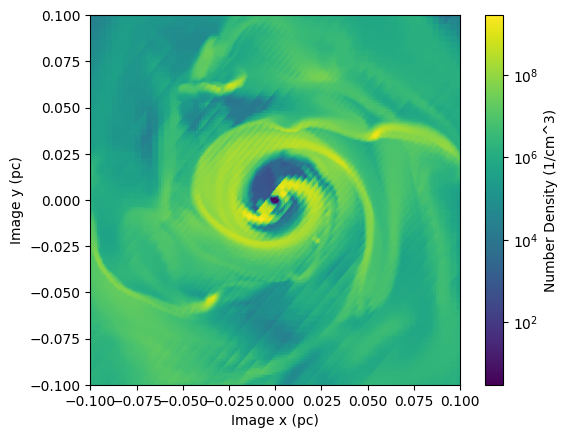

In [36]:
frb = p.data_source.to_frb((width, "pc"), 800, periodic=True)
vel_r_cyl = frb[("gas", "number_density")]
vmin = vel_r_cyl.min()*2
vmax = vel_r_cyl.max()*0.5
bounds = (-width/2, width/2, -width/2, width/2)
plt.imshow(vel_r_cyl.d, cmap='viridis', extent=bounds, origin="lower", aspect='equal', norm=LogNorm(vmin=vmin, vmax=vmax))

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Number Density (1/cm^3)')

# Adjust colormap scaling to match yt's automatic scaling
vmin = vel_r_cyl.min()
vmax = vel_r_cyl.max()
plt.clim(vmin, vmax)

# Show the plot
plt.xlabel('Image x (pc)')
plt.ylabel('Image y (pc)')
plt.show()

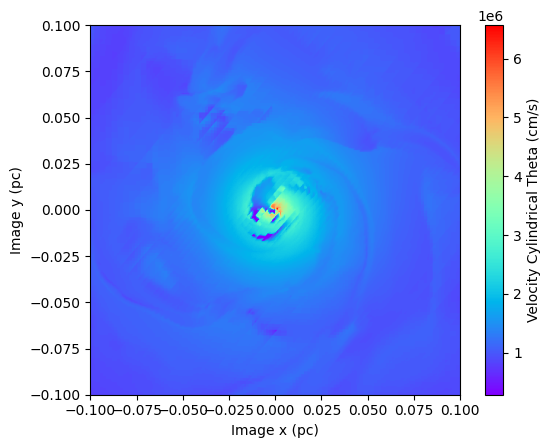

In [39]:
frb = p.data_source.to_frb((width, "pc"), 800)
vel_r_theta= frb[("gas", "velocity_cylindrical_theta")]
vmin = np.abs(vel_r_theta).min()*100
vmax = vel_r_theta.max()
bounds = (-width/2, width/2, -width/2, width/2)
plt.imshow(vel_r_theta, cmap='rainbow', extent=bounds, origin="lower", aspect='equal')

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Velocity Cylindrical Theta (cm/s)')

# Adjust colormap scaling to match yt's automatic scaling
plt.clim(vmin, vmax)

# Show the plot
plt.xlabel('Image x (pc)')
plt.ylabel('Image y (pc)')
plt.show()

In [40]:
print(f"ss_age = {ss_age/1e6} Myr, ss_mass = {ss_mass}, ds = {ds}")

ss_age = [0.96010047] Myr, ss_mass = 2020.8916806405375 Msun, ds = DD0226
